In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Audio Filters and Equalizers

## 1. Introduction
Digital audio processing encompasses a broad range of techniques for manipulating sound, and at the heart of these techniques are audio filters and equalizers. This project delves into the mathematical concepts and practical implementations of these essential tools using Python.

### What is an audio signal?
An audio signal refers to an electrical representation of sound waves that can be captured, transmitted, stored, or processed by electronic devices. It carries the essential information of the sound, including its frequency, amplitude, and phase, allowing us to perceive and reproduce auditory experiences. In simple terms, when we speak, play music, or any other sound is produced, it creates vibrations in the air. These vibrations travel as sound waves and eventually reach our ears. An audio signal converts these sound waves into an electrical signal that can be used by various technological devices, such as speakers. (1)

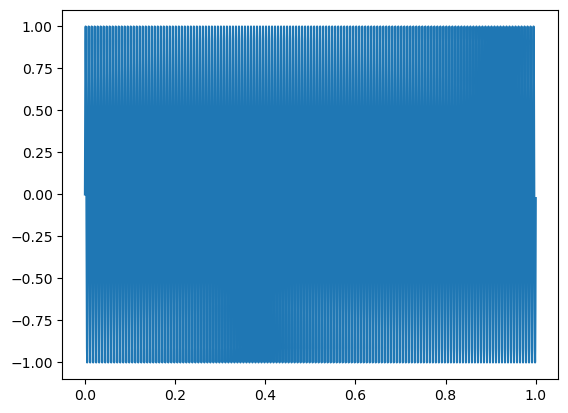

In [8]:
sr = 44100
frequency = 150
length = 1.0

t = np.arange(0, length, 1.0/sr)
signal = np.sin(np.pi * 2 * frequency * t)

plt.plot(t, signal)
plt.show()

In [19]:
signal *= 32767 # we use it as a constant 
signal = np.int16(signal)
wavfile.write("audio_signal.wav", sr, signal)

### What is sample width, sample rate(frequency)?
#### Sample rate
Sample rate is the number of samples per second that are taken of a waveform to create a discete digital signal. The higher the sample rate, the more snapshots you capture of the audio signal. (3)
#### Sample width (bit depth)
The audio bit depth determines the number of possible amplitude values we can record for each audio sample. The higher the bit depth, the more amplitude values per sample are captured to recreate the original audio signal. (3)

### What is a spectrogram and how to interpret it?

## Refferences
1. https://cc-techgroup.com/terms/a/audio-signal/
2. https://swharden.com/blog/2020-09-23-signal-filtering-in-python/
3. https://www.izotope.com/en/learn/digital-audio-basics-sample-rate-and-bit-depth.html
4. https://www.scicoding.com/how-to-do-spectrogram-in-python/